In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch.nn as nn
import torch
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader

In [ ]:
dataset = data = pd.read_csv('NY.csv')
dataset

,date,state,positive,negative,hospitalizedCurrently,recovered,death,hospitalized,total,totalTestResults,posNeg,mobility_driving (%+100),mobility_retail_and_recreation (%+100),mobility_grocery_and_pharmacy (%+100),mobility_parks (%+100),mobility_transit_stations (%+100),mobility_workplaces (%+100),mobility_residential,minimum_temperature (K),maximum_temperature (K),rainfall,snowfall
0,3/4/2020,NY,6,48,0,0,0,0,78,54,54,108.0,107.0,108.0,116.0,100.0,103.0,100.0,272.0,276.0,0.0,0.0
1,3/5/2020,NY,22,76,0,0,0,0,122,98,98,113.0,108.0,109.0,121.0,100.0,104.0,99.0,270.0,273.0,0.0,0.0
2,3/6/2020,NY,33,92,0,0,0,0,361,125,125,127.0,99.0,100.0,89.0,97.0,103.0,101.0,270.0,275.0,0.0,0.0
3,3/7/2020,NY,76,92,0,0,0,0,404,168,168,128.0,110.0,108.0,117.0,100.0,106.0,99.0,266.0,271.0,0.0,0.0
4,3/8/2020,NY,105,92,0,0,0,0,197,197,197,99.0,110.0,107.0,161.0,100.0,102.0,99.0,268.0,277.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,5/22/2020,NY,358154,1242639,4844,63292,23195,76843,1600793,1600793,1600793,100.0,NaN,NaN,NaN,NaN,NaN,NaN,287.0,298.0,10.0,0.0
80,5/23/2020,NY,359926,1292135,4844,63292,23282,77034,1652061,1652061,1652061,84.0,NaN,NaN,NaN,NaN,NaN,NaN,282.0,299.0,0.0,0.0
81,5/24/2020,NY,361515,1338311,4393,64080,23391,77295,1699826,1699826,1699826,83.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,5/25/2020,NY,362764,1376685,4348,64280,23488,77525,1739449,1739449,1739449,77.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
datasetA1 = pd.DataFrame(data,  columns = ['positive', 'negative', 'hospitalizedCurrently','recovered', 'death', 'hospitalized', 'total', 'totalTestResults', 'posNeg', 'mobility_driving (%+100)', 'mobility_retail_and_recreation (%+100)', 'mobility_grocery_and_pharmacy (%+100)', 'mobility_parks (%+100)', 'mobility_transit_stations (%+100)', 'mobility_workplaces (%+100)', 'mobility_residential', 'minimum_temperature (K)', 'maximum_temperature (K)'])
#datasetA= pd.DataFrame(data, columns = ['cases', 'fatalities', 'humidity',	'sunHour',	'tempC', 'windspeedKmph'])
print(datasetA1)
n_timesteps = 69                    #determine this based on how much data there is before 'NaN's
datasetA1 = np.array(datasetA1)
datasetA1 = datasetA1[1:n_timesteps,:] #want an even number of timesteps
print(datasetA1)
datasetA1.shape

    positive  negative  ...  minimum_temperature (K)  maximum_temperature (K)
0          6        48  ...                    272.0                    276.0
1         22        76  ...                    270.0                    273.0
2         33        92  ...                    270.0                    275.0
3         76        92  ...                    266.0                    271.0
4        105        92  ...                    268.0                    277.0
..       ...       ...  ...                      ...                      ...
79    358154   1242639  ...                    287.0                    298.0
80    359926   1292135  ...                    282.0                    299.0
81    361515   1338311  ...                      NaN                      NaN
82    362764   1376685  ...                      NaN                      NaN
83    363836   1410292  ...                      NaN                      NaN

[84 rows x 18 columns]
[[2.20000e+01 7.60000e+01 0.00000e+00 ..

(68, 18)

In [ ]:
# Feature Scaling - Normalizing
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range = (0, 1))

# scale the data
datasetA1 = datasetA1.reshape(datasetA1.shape[0], datasetA1.shape[1])         #change this last number
print(datasetA1.shape)
datasetA = sc.fit_transform(datasetA1)
print(datasetA.shape)
print(datasetA[:datasetA1.shape[1]])
print(datasetA[-datasetA1.shape[1]:])

#datasetA = torch.FloatTensor(datasetA).view(-1)
items = []
print(datasetA.shape)
for all in datasetA:
  items.append(all)
print(items)
datasetA.shape

(68, 18)
(68, 18)
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 8.40425532e-01 9.76470588e-01 7.36111111e-01
  6.29629630e-01 1.00000000e+00 9.72222222e-01 0.00000000e+00
  2.66666667e-01 8.00000000e-02]
 [3.26377536e-05 1.84433788e-05 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.98417805e-04 2.24149539e-05
  2.24149539e-05 9.89361702e-01 8.70588235e-01 6.11111111e-01
  3.92592593e-01 9.60526316e-01 9.58333333e-01 6.06060606e-02
  2.66666667e-01 1.60000000e-01]
 [1.60221699e-04 1.84433788e-05 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 2.34116406e-04 5.81128435e-05
  5.81128435e-05 1.00000000e+00 1.00000000e+00 7.22222222e-01
  6.00000000e-01 1.00000000e+00 1.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.46266686e-04 1.84433788e-05 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 6.22650015e-05 8.21881644e-05
  8.21881644e-0

(68, 18)

In [ ]:
def create_dataset(n_X, look_back):
   dataX, dataY = [], []
   for i in range(len(n_X)-look_back):
      a = n_X[i:(i+look_back), ]
      dataX.append(a)
      dataY.append(n_X[i + look_back, ])
   return np.array(dataX), np.array(dataY)

look_back = 17                                                      #this is the lookback window
X,Y = create_dataset(datasetA, look_back)
print(X.shape)
print(Y.shape)
#print(Y)

type(Y)
list(Y)
new_Y = []
for i in range(datasetA1.shape[0]-look_back):                         #change this to the number of sample
  new_Y.append(Y[i][0:datasetA.shape[1]])

#print(new_Y)
Y = np.array(new_Y)
Y = np.reshape(Y, (datasetA1.shape[0]-look_back,datasetA.shape[1]))                    #change this to number of samples
#print(Y)

(51, 17, 18)
(51, 18)


In [ ]:
trainx = X[:int(0.8*(len(X))+1)]
testx = X[int(0.8*(len(X)))+1:]
trainy = Y[:int(0.8*(len(Y))+1)]
testy = Y[int(0.8*(len(Y)))+1:]
print(trainx.shape)
print(trainy.shape)
print(testx.shape)
print(testy.shape)

# print(X)
# print(Y)
#print(trainy)

(41, 17, 18)
(41, 18)
(10, 17, 18)
(10, 18)


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_22 (LSTM)               (None, 17, 100)           47600     
_________________________________________________________________
lstm_23 (LSTM)               (None, 17, 64)            42240     
_________________________________________________________________
lstm_24 (LSTM)               (None, 32)                12416     
_________________________________________________________________
dropout_8 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 18)                594       
Total params: 102,850
Trainable params: 102,850
Non-trainable params: 0
_________________________________________________________________
Train on 41 samples, validate on 10 samples
Epoch 1/100
 - 2s - loss: 0.0869 - mse: 0.0869 - mae: 0.2618 - mape: 8

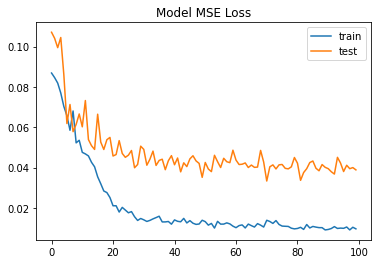

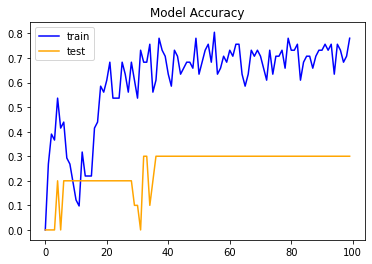

<Figure size 432x288 with 0 Axes>

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import LSTM

window_size = look_back
num_features = datasetA1.shape[1]
output_dim = num_features
model = Sequential()
model.add(LSTM(100, activation = 'relu', input_shape=(window_size, num_features), return_sequences=True))
model.add(LSTM(64, activation = 'relu', return_sequences = True))
model.add(LSTM(32,activation='relu'))
model.add(Dropout(rate=0.1))
model.add(Dense(output_dim, activation='sigmoid'))
model.compile(loss='mse', optimizer='adam', metrics=['mse', 'mae', 'mape', 'accuracy'])
model.summary()
history = model.fit(trainx,trainy, epochs=100, batch_size=10, validation_data=(testx,testy), verbose=2, shuffle=False)
# history = model.fit(X,Y, epochs=50, batch_size=3, validation_split=0.2, verbose=2, shuffle=False)

# save model
model.save('NY_COVID-19_Model.h5')

# plot loss
plt.title('Model MSE Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()
plt.savefig('NY_Model_MSE_Loss.png')

# plot accuracy
plt.title('Model Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='test')
plt.legend()
plt.show()
plt.savefig('NY_Model_Accuracy.png')

[728868.7, 760372.06, 794995.94, 830057.6, 854972.9, 878223.9, 902669.94, 923282.56, 941925.1]


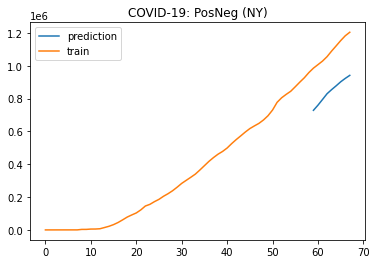

Test Percentage Error: 22.537
Test RMS Error: 284871.568


<Figure size 432x288 with 0 Axes>

In [ ]:
#here will plot the results, of a multitoone model veruses a multitomulti model, will compare the change in death
import statistics as stat
finalone = []
col = 8;
n_days = 10;
for i in range(0,n_days):
  test_input = trainx[-i,:].reshape((1, window_size, num_features))
  #print(test_input.shape)
  test_output = model.predict(test_input, verbose=0)
  #print(test_output.shape)
  #test_output = np.pad(test_output, (0,num_features-1), 'constant', constant_values=(test_output[0]))
  #test_output = test_output[:,col]
  test_output = np.reshape(test_output, (1,num_features))
  inv_yhat = sc.inverse_transform(test_output)
  finalone.append(inv_yhat[0][col])

finalone = finalone[1:]
print(finalone[::-1])
plt.title('COVID-19: PosNeg (NY)')
plt.plot(np.arange((datasetA.shape[0]-9),datasetA.shape[0]), finalone[::-1], label='prediction' )
plt.plot(np.arange(0,datasetA.shape[0]), datasetA1[:,col], label='train')
plt.legend()
plt.show()
plt.savefig('Train_NY_posNeg_eval.png')

actual = datasetA1[-(n_days-1):,col]
scaled_err = abs(stat.mean(actual)-stat.mean(finalone))/stat.mean(actual) * 100
print('Test Percentage Error: %.3f' % scaled_err)
rms = np.sqrt(((finalone - actual) ** 2).mean())
print('Test RMS Error: %.3f' % rms)

[982554.3, 1004750.4, 1027199.7, 1049132.4, 1068994.5, 1087378.0, 1105430.6, 1119988.1, 1130750.1]
[ 959071.  985911. 1007310. 1028899. 1055921. 1089916. 1121543. 1153768.
 1182998. 1204651.]


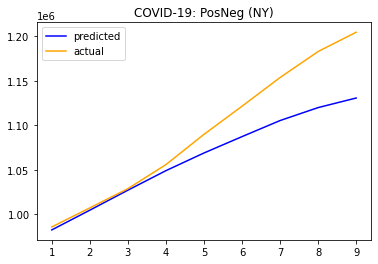

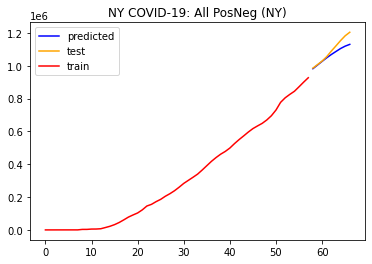

Test Percentage Error: 0.096
Test RMS Error: 121845.373


<Figure size 432x288 with 0 Axes>

In [ ]:
#here will plot the results, of a multitoone model veruses a multitomulti model, will compare the change in death
finalone = []
col = 8;
n_days = testx.shape[0]
for i in range(0,n_days):
  test_input = testx[-i].reshape((1, window_size, num_features))
  test_output = model.predict(test_input, verbose=0)
  #test_output = np.pad(test_output, (0,num_features-1), 'constant', constant_values=(test_output[0]))
  #test_output = test_output[0]
  #test_output = np.reshape(test_output, (1,num_features))
  inv_yhat = sc.inverse_transform(test_output)
  finalone.append(inv_yhat[0][col])
finalone = finalone[1:]
print(finalone[::-1])
actual = datasetA1[-(testx.shape[0]):,col]
print(actual[::1])

plt.title('COVID-19: PosNeg (NY)')
time1 = np.arange(0,testx.shape[0]-1,1)
plt.plot(time1+1, finalone[::-1], color = 'blue', label = 'predicted')
plt.plot(time1+1, datasetA1[-(testx.shape[0]-1):,col], color = 'orange', label = 'actual')
plt.legend()
plt.show()
plt.savefig('NY_posNeg_eval.jpg')

plt.title('NY COVID-19: All PosNeg (NY)')
time2 = np.arange(0,datasetA1.shape[0]-testx.shape[0],1)
plt.plot(time1+datasetA1.shape[0]-testx.shape[0], finalone[::-1], color = 'blue', label = 'predicted')
plt.plot(time1+datasetA1.shape[0]-testx.shape[0], datasetA1[-(testx.shape[0]-1):,col], color = 'orange', label = 'test')
plt.plot(time2, datasetA1[:-testx.shape[0],col], color = 'red', label = 'train')
plt.legend()
plt.show()
plt.savefig('NY_posNeg_all.jpg')

import statistics as stat
# calculate RMSE
finalone = np.array(finalone)
actual = np.array(actual)
scaled_err = abs(stat.mean(actual[:-1])-stat.mean(finalone))/stat.mean(actual[:-1]) * 100
print('Test Percentage Error: %.3f' % scaled_err)
rms = np.sqrt(((finalone - actual[:-1]) ** 2).mean())
print('Test RMS Error: %.3f' % rms)
#numbers seem too low, must be due to padding zeros and then inverse scaling the predicted output number??

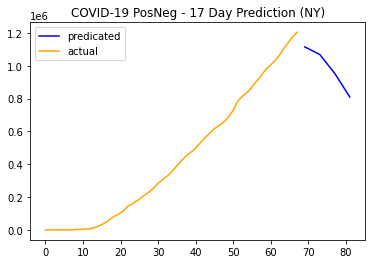

[1115355.125  1069291.125   953716.5625  810152.75  ]


<Figure size 432x288 with 0 Axes>

In [ ]:
#here will plot the results, of a multitoone model veruses a multitomulti model, will compare the change in death
items = []
test_input1 = datasetA1
j = int(datasetA1.shape[0]/window_size)
n_days = look_back
for a in range(0,n_days):
  test_input = test_input1.reshape(test_input1.shape[0], test_input1.shape[1])
  test_input = sc.fit_transform(test_input)
  for all in test_input:
    items.append(all)
  test_input = test_input.reshape(j, window_size, num_features)
  test_output = model.predict(test_input, verbose=0)
  test_output = np.reshape(test_output, (j,num_features))
  test_output = sc.inverse_transform(test_output)
  test_input1 = np.vstack((test_input1[j:,:],test_output))
  #print(test_input1.shape)
data =  test_input1[(test_input1.shape[0]-look_back):,:]
idx = np.arange(1,n_days,int(n_days/j))
#print(idx)
data = data[idx,:]
#data.shape
col = 8
plt.title('COVID-19 PosNeg - 17 Day Prediction (NY)')
plt.plot(idx+datasetA1.shape[0], data[:,col], color = 'blue',label = 'predicated')
plt.plot(np.arange(0,datasetA1.shape[0]), datasetA1[:,col], color='orange', label = 'actual')
plt.legend()
plt.show()
plt.savefig('NY_17Day_Future_Prediction.png')
print(data[:,col])